# Data Science Notebook.

This is Hari Prasad and I am creating this notebook for the learning purpose of beginers. It works only on Iris dataset and covers regressions, classifications using classical models to advanced deep learning models. Regression cases are explained in the begining but there onwards it will not be explored as much as multiclass classification and left for the learner to playaround to change target variables and convert the problem to find say, sepal length.

Objective is to get kick started with quick and dirty, means: Just get the data and apply the algorithm and predict the code. As I develop this notebook further, I am planning to introduce the proper structure of data science project.

## Start

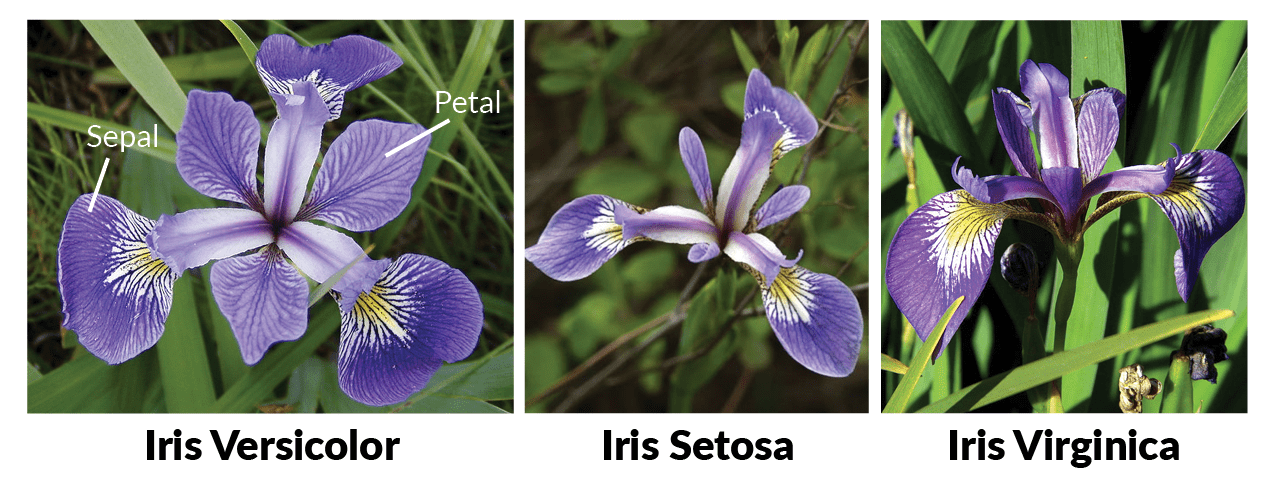

In [1]:
from IPython.display import Image
PATH = "C:\\Users\\IBM_ADMIN\\Pictures\\"
Image(filename = PATH + "iris.png")

In [2]:
#Change the directory.
import os
os.getcwd()

'C:\\Users\\IBM_ADMIN'

In [3]:
path="Z:\\Documents\\Machine Learning"
os.chdir(path)

In [4]:
#Import file with header.
from pandas import read_csv
data=read_csv("iris.csv")

In [5]:
data.shape

(150, 5)

In [6]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
cat              object
dtype: object

In [7]:
#One hot code encoding of categorical variable cat.
import pandas as pd
one_hot=pd.get_dummies(data.cat)

In [8]:
df=data.join(one_hot)
df.dtypes
#What does dtype at the end signifies?

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
cat                 object
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [9]:
#Drop Categorical columns
df=df.drop('cat',axis=1)

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [11]:
#For Regression let us predict sepal_length from other variables.
from sklearn.linear_model import LinearRegression

In [12]:
#Create Model.
model=LinearRegression()

In [13]:
#Create Features and Target Dataframes.
array = df.values

In [14]:
df.dtypes

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [15]:
#Our Prediction column is at 0 th index and all other (1 till 7th) are our predictors columns
X=array[:,1:7]
Y=array[:,0]

In [16]:
#Split the data in to train and test sets.
test_size = 0.33
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [17]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#Parameters Learnt
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 0.5909224   0.7962453  -0.28641615  0.4916739  -0.09938941 -0.3922845 ]


In [19]:
print(model.predict(X_test))
y_pred = model.predict(X_test)

[ 6.31902086  6.22009361  4.90233254  6.22009361  5.57445409  4.19322566
  6.59768397  5.86122653  5.11075551  6.33827809  6.56093303  6.42782096
  5.47341827  7.2693283   4.95150645  6.49122684  6.58093137  6.69661122
  5.34712447  4.88249587  5.65099456  6.77174444  6.34889205  5.85258325
  6.9336758   6.08014727  6.05903554  5.42273492  6.11310252  6.60438606
  5.96196279  5.33068743  4.75119281  6.53106184  6.05903554  4.68649587
  4.93097416  5.42855801  4.98195707  6.87009225  6.88811991  6.36942434
  6.48439257  6.63751898  6.06714487  4.89241421  6.22820294  5.49244112
  6.27235158  4.99257103]


In [20]:
#Mean Squared error
from sklearn.metrics import mean_squared_error
print("Mean squared error:", mean_squared_error(Y_test, y_pred))

Mean squared error: 0.101770346868


In [21]:
from sklearn.metrics import r2_score
# Explained variance score: 1 is perfect prediction
print('Variance score:',r2_score(Y_test, y_pred))

Variance score: 0.819490832024


In [22]:
#Logistic Regression
#We will predict the class of flower and then we will check the accuracy.
#We have to make it cat
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
cat              object
dtype: object

In [23]:
data["cat"] = data["cat"].astype('category')

In [24]:
data.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
cat             category
dtype: object

In [25]:
#import pandas as pd
#data.cat = pd.Categorical(data.cat).codes

In [26]:
#Create Features and Target Dataframes.
array_log = data.values

In [27]:
data.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
cat             category
dtype: object

In [28]:
#Our Prediction column is at 4 th index and all other (0 till 5th) are our predictors columns
#From 0 coulmn I want 4 columns
X=array_log[:,0:4]
Y=array_log[:,4]

In [29]:
#For Regression let us predict sepal_length from other variables.
from sklearn.linear_model import LogisticRegression

In [30]:
model_log=LogisticRegression(multi_class="ovr")

In [31]:
#Split the data in to train and test sets.
test_size = 0.33
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [32]:
model_log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print(model_log.predict(X_test))
y_pred = model_log.predict(X_test)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


In [34]:
Y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa'], dtype=objec

In [35]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.90000000000000002

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

array([[14,  0,  0],
       [ 0, 14,  4],
       [ 0,  1, 17]], dtype=int64)

In [37]:
#Accuracy Report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.93      0.78      0.85        18
 Iris-virginica       0.81      0.94      0.87        18

    avg / total       0.91      0.90      0.90        50



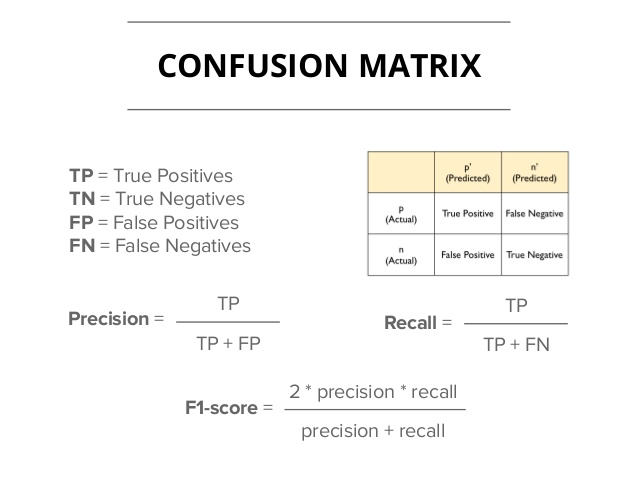

In [38]:
Image(filename = PATH + "pr2.jpg")

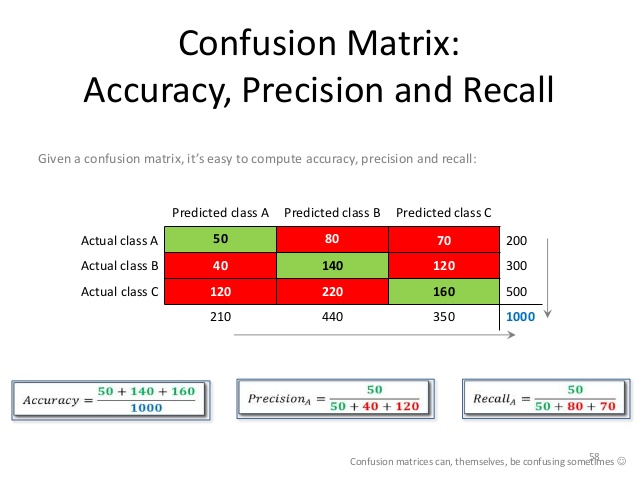

In [39]:
Image(filename = PATH + "pr.jpg")

In [40]:
#Deep Learning
#	4 inputs -> [8 hidden nodes] -> 3 outputs
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [41]:
#Create Features and Target Dataframes.
array = df.values

In [42]:
df.dtypes

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [43]:
#Our Prediction column is at 0 th index and all other (1 till 7th) are our predictors columns
X=array[:,0:4]
Y=array[:,4:7]

In [44]:
#Split the data in to train and test sets.
test_size = 0.33
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [45]:
#Dimensions of Input_dim (Number of features) and Output Dimension(Y dimension).
X.shape[1],Y.shape[1]

(4, 3)

In [46]:
#Baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
model=baseline_model()
model.fit(X_train, Y_train,epochs=200,batch_size=5,verbose=0)

In [48]:
results = model.evaluate(X_test, Y_test)

50/50 [==============================] - 0s 645us/step


In [52]:
print ( "Accuracy",results[1])

Accuracy 0.98


In [54]:
import numpy as np
predictions=np.round(model.predict(X_test))
predictions.shape

(50, 3)

In [55]:
predictions[0:2]

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.]], dtype=float32)

In [56]:
Y_test[0:2]

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.]])

### Label ranking average precision

Multioutput Classification Metrics.
http://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics

The label_ranking_average_precision_score function implements label ranking average precision (LRAP). This metric is linked to the average_precision_score function, but is based on the notion of label ranking instead of precision and recall.

Label ranking average precision (LRAP) is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score. This metric will yield better scores if you are able to give better rank to the labels associated with each sample. The obtained score is always strictly greater than 0, and the best value is 1. If there is exactly one relevant label per sample, label ranking average precision is equivalent to the mean reciprocal rank.

In [57]:
#Multioutput Classification Metrics.
#http://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics
from sklearn.metrics import label_ranking_average_precision_score
print(label_ranking_average_precision_score(Y_test, predictions))

0.986666666667


In [58]:
#Tensorflow
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

In [75]:
Image(url ="https://isaacchanghau.github.io/images/deeplearning/activationfunction/softmax.png")

In [76]:
##Courtesy: https://www.linkedin.com/pulse/artificial-intelligence-how-do-neural-networks-work-better-vignali
Image(url ="https://i.stack.imgur.com/vPTf6.png")

In [77]:
Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAo6AAAAJGNlNjZhZDhiLTNjNzktNGVmOS1iZGZlLWE1MmY5NWI5ODBmOQ.png")

In [78]:

Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAA2eAAAAJDY1ZWRkNmU5LThkNmQtNGU1YS1iNmUzLWEwNDc1NzE3MTJhMQ.png")

In [79]:
Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAvOAAAAJDIzMGRiZGI3LTA1MzQtNDk1ZS1iZGIxLWY4Y2FkMWQ0MTQwYg.png")

In [80]:
Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAqgAAAAJGU3YTkzNjM4LTk3YjYtNGE2Mi1iMTIyLTQ3MGU0YzNiMDc1Mw.png")

In [59]:
# Session
sess = tf.Session()

In [60]:
# Interval / Epochs
interval = 50
epoch = 500

In [61]:
# Initialize placeholders
X_data = tf.placeholder(shape=[None, 4], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 3], dtype=tf.float32)

In [62]:
# Input neurons : 4
# Hidden neurons : 8
# Output neurons : 3
hidden_layer_nodes = 8

# Create variables for Neural Network layers
w1 = tf.Variable(tf.random_normal(shape=[4,hidden_layer_nodes])) # Inputs -> Hidden Layer
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # First Bias
w2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,3])) # Hidden layer -> Outputs
b2 = tf.Variable(tf.random_normal(shape=[3]))   # Second Bias

In [63]:
# Operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(X_data, w1), b1))
final_output = tf.nn.softmax(tf.add(tf.matmul(hidden_output, w2), b2))

### Defining Cross Entropy Loss

In [73]:
Image(url = "https://theneuralperspective.files.wordpress.com/2016/10/screen-shot-2016-11-06-at-8-13-41-pm.png?w=620")

In [74]:
Image(url="https://image.slidesharecdn.com/gentlestintrototensorflowpart3-160629045311/95/gentlest-introduction-to-tensorflow-part-3-71-638.jpg?cb=1486266200")

In [64]:
# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y_target * tf.log(final_output), axis=0))

In [65]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [66]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [67]:
# Training
print('Training the model...')
for i in range(1, (epoch + 1)):
    sess.run(optimizer, feed_dict={X_data: X_train, y_target: Y_train})
    if i % interval == 0:
        print('Epoch', i, '|', 'Loss:', sess.run(loss, feed_dict={X_data: X_train, y_target: Y_train}))

Training the model...
Epoch 50 | Loss: 12.169
Epoch 100 | Loss: 6.09593
Epoch 150 | Loss: 5.05122
Epoch 200 | Loss: 4.59034
Epoch 250 | Loss: 4.2381
Epoch 300 | Loss: 3.96139
Epoch 350 | Loss: 3.73608
Epoch 400 | Loss: 3.5496
Epoch 450 | Loss: 3.39378
Epoch 500 | Loss: 3.26067


In [68]:
# Prediction
import numpy as np
print()
for i in range(len(X_test)):
    print('Actual:', Y_test[i], 'Predicted:', np.rint(sess.run(final_output, feed_dict={X_data: [X_test[i]]})))


Actual: [ 0.  0.  1.] Predicted: [[ 0.  0.  1.]]
Actual: [ 0.  1.  0.] Predicted: [[ 0.  0.  1.]]
Actual: [ 1.  0.  0.] Predicted: [[ 1.  0.  0.]]
Actual: [ 0.  1.  0.] Predicted: [[ 0.  1.  0.]]
Actual: [ 0.  0.  1.] Predicted: [[ 0.  0.  1.]]
Actual: [ 1.  0.  0.] Predicted: [[ 1.  0.  0.]]
Actual: [ 0.  1.  0.] Predicted: [[ 0.  1.  0.]]
Actual: [ 0.  1.  0.] Predicted: [[ 0.  1.  0.]]
Actual: [ 1.  0.  0.] Predicted: [[ 1.  0.  0.]]
Actual: [ 0.  1.  0.] Predicted: [[ 0.  1.  0.]]
Actual: [ 0.  1.  0.] Predicted: [[ 0.  1.  0.]]
Actual: [ 0.  1.  0.] Predicted: [[ 0.  1.  0.]]
Actual: [ 1.  0.  0.] Predicted: [[ 1.  0.  0.]]
Actual: [ 0.  0.  1.] Predicted: [[ 0.  0.  1.]]
Actual: [ 1.  0.  0.] Predicted: [[ 1.  0.  0.]]
Actual: [ 0.  1.  0.] Predicted: [[ 0.  0.  1.]]
Actual: [ 0.  0.  1.] Predicted: [[ 0.  0.  1.]]
Actual: [ 0.  0.  1.] Predicted: [[ 0.  0.  1.]]
Actual: [ 1.  0.  0.] Predicted: [[ 1.  0.  0.]]
Actual: [ 1.  0.  0.] Predicted: [[ 1.  0.  0.]]
Actual: [ 0.  1.  0

In [69]:
predicted_tf=(np.rint(sess.run(final_output, feed_dict={X_data: X_test})))

In [70]:
#Multioutput Classification Metrics.
#http://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics
from sklearn.metrics import label_ranking_average_precision_score
print(label_ranking_average_precision_score(Y_test, predicted_tf))

0.973333333333
